In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt

We will use the Maddison Project Database 2020. We first read the dataset and clear the data. Filter out countries with no recorded GDP in 1870.

In [2]:
# Read the CSV data
data = pd.read_csv("mpd2020.csv")

subset1 = data[data['gdppc'].notna()]

# Filter rows for the year 1870
gdp1870 = subset1.loc[subset1['year'] == 1870].copy()

# Filter rows for the year 2000 and countries present in gdp1870
subset2 = subset1.loc[subset1['year'] == 2000].copy()
gdp2000 = subset2.loc[subset2['country'].isin(gdp1870['country'])].copy()

# Remove commas and convert gdppc to numeric
gdp1870['gdppc'] = gdp1870['gdppc'].str.replace(',', '').astype(float)
gdp2000['gdppc'] = gdp2000['gdppc'].str.replace(',', '').astype(float)

# Convert countrycode to a factor (equivalent to R's as.factor())
gdp1870['countrycode'] = pd.Categorical(gdp1870['countrycode'])


a.

We now calculated the growth rate from 1870 to 2000 for these 67 countries.

In [3]:
n = 2000-1870
gdp1870['growthrate'] = ((gdp2000['gdppc'].values / gdp1870['gdppc'].values) ** (1 / n)) - 1
gdp1870['growthrate'] = gdp1870['growthrate']*100

In [4]:
gdp1870.describe()

,year,gdppc,growthrate
count,67.0,67.000000,67.000000
mean,1870.0,1796.283582,1.643463
std,0.0,1237.528044,0.495151
min,1870.0,362.000000,0.603414
25%,1870.0,956.000000,1.316141
50%,1870.0,1339.000000,1.620578
75%,1870.0,2160.500000,1.938901
max,1870.0,5829.000000,2.619587


b.

Create a plot of growth rate against GDP per capita in 1870.

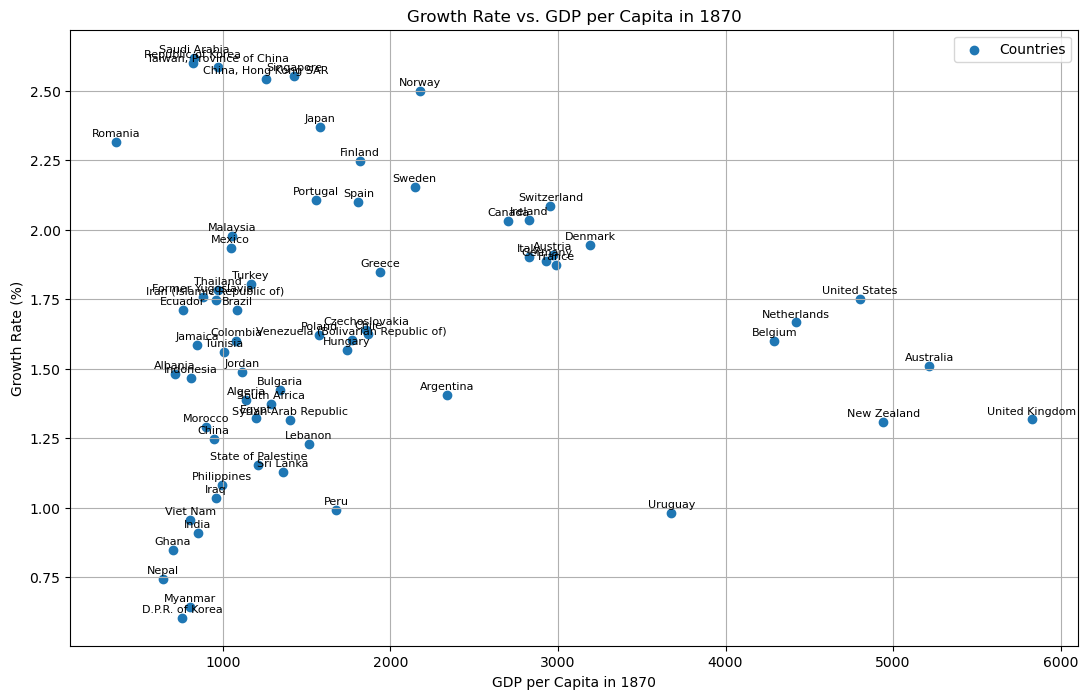

In [5]:
# Create a scatter plot with labels
plt.figure(figsize=(13, 8))
plt.scatter(gdp1870['gdppc'], gdp1870['growthrate'], label='Countries', marker='o')

# Label each point with the country name
for i, row in gdp1870.iterrows():
    x = row['gdppc']
    y = row['growthrate']
    label = row['country']
    
    label_x = x + 0
    label_y = y - 0.03
    plt.annotate(label, (label_x, label_y), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=8)
    
plt.xlabel('GDP per Capita in 1870')
plt.ylabel('Growth Rate (%)')
plt.title('Growth Rate vs. GDP per Capita in 1870')
plt.grid(True)
plt.legend()
plt.show()

c.

Now we want to do the same using log of GDP per capita in 1870. Log is approximately growth rate.

In [7]:
gdp1870log = gdp1870.copy()

In [8]:
gdp1870log['loggdp'] = 100*(np.log(gdp2000.gdppc.values)-np.log(gdp1870log.gdppc.values))/n
gdp1870log['logpc'] = np.log(gdp1870log.gdppc.values)

In [9]:
gdp1870log.describe()

,year,gdppc,growthrate,loggdp,logpc
count,67.0,67.000000,67.000000,67.000000,67.000000
mean,1870.0,1796.283582,1.643463,1.628936,7.304190
std,0.0,1237.528044,0.495151,0.487058,0.598872
min,1870.0,362.000000,0.603414,0.601600,5.891644
25%,1870.0,956.000000,1.316141,1.307556,6.862758
50%,1870.0,1339.000000,1.620578,1.607587,7.199678
75%,1870.0,2160.500000,1.938901,1.920344,7.678066
max,1870.0,5829.000000,2.619587,2.585864,8.670601


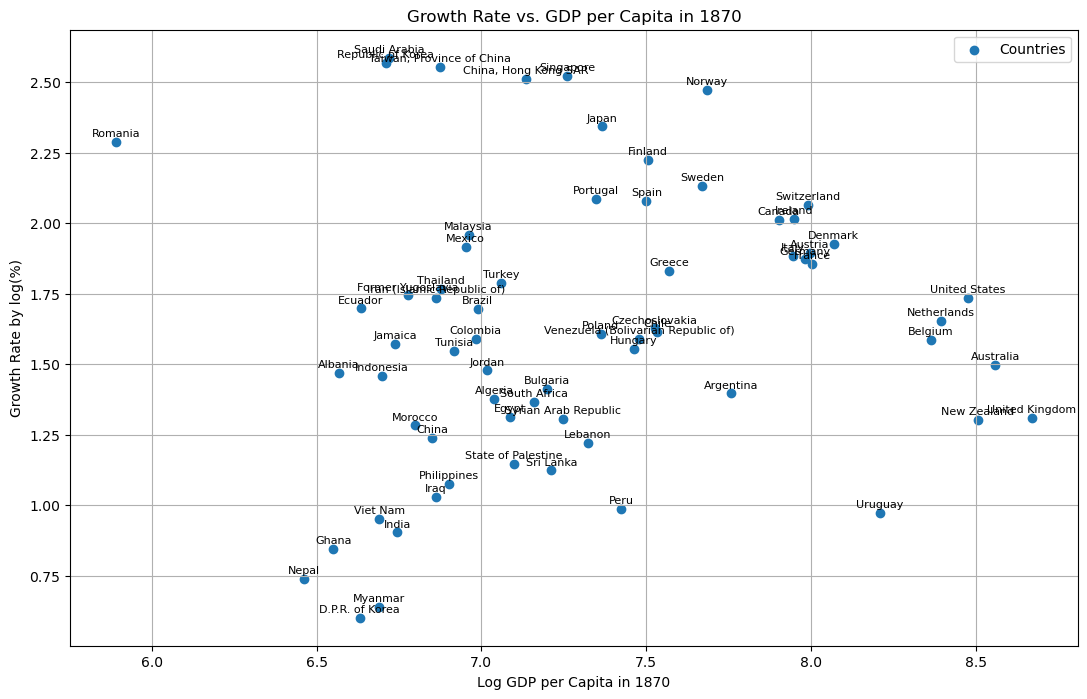

In [11]:
# Create a scatter plot with labels
plt.figure(figsize=(13, 8))
plt.scatter(gdp1870log['logpc'], gdp1870log['loggdp'], label='Countries', marker='o')

# Label each point with the country name
for i, row in gdp1870log.iterrows():
    x = row['logpc']
    y = row['loggdp']
    label = row['country']
    
    label_x = x + 0
    label_y = y - 0.03
    plt.annotate(label, (label_x, label_y), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=8)
    
plt.xlabel('Log GDP per Capita in 1870')
plt.ylabel('Growth Rate by log(%)')
plt.title('Growth Rate vs. GDP per Capita in 1870')
plt.grid(True)
plt.legend()
plt.show()

After comparing these two plots, we can see the two figures have the same pattern.

d.

There is divergence base on the plot. As we can see from the left lower corner, the poorest countries do not diverge and their growth rate is relatively low. Countries with middle income have higher gowth rate, for instance, Japan, Spain and Finland. For rich countries like the US and the UK, the growth rate is low too.Therefore, we can see divergence from these 67 countries.

e.

How about growth rate in the last century? That is, from 1900 to 2000.

In [14]:
gdp1900 = subset1.loc[subset1['year'] == 1900].copy()

# Filter rows for the year 2000 and countries present in gdp1870
subset2 = subset1.loc[subset1['year'] == 2000].copy()
gdp2000_v2 = subset2.loc[subset2['country'].isin(gdp1900['country'])].copy()

# Remove commas and convert gdppc to numeric
gdp1900['gdppc'] = gdp1900['gdppc'].str.replace(',', '').astype(float)
gdp2000_v2['gdppc'] = gdp2000_v2['gdppc'].str.replace(',', '').astype(float)

# Convert countrycode to a factor (equivalent to R's as.factor())
gdp1900['countrycode'] = pd.Categorical(gdp1900['countrycode'])

In [16]:
gdp1900['growthrate'] = ((gdp2000_v2['gdppc'].values / gdp1900['gdppc'].values) ** (1 / 100)) - 1
gdp1900['growthrate'] = gdp1900['growthrate']*100

In [17]:
gdp1900.describe()

,year,gdppc,growthrate
count,45.0,45.000000,45.000000
mean,1900.0,3016.666667,1.916657
std,0.0,2014.926865,0.488021
min,1900.0,615.000000,1.049610
25%,1900.0,1323.000000,1.562955
50%,1900.0,2659.000000,1.895882
75%,1900.0,4584.000000,2.331710
max,1900.0,8038.000000,2.881138


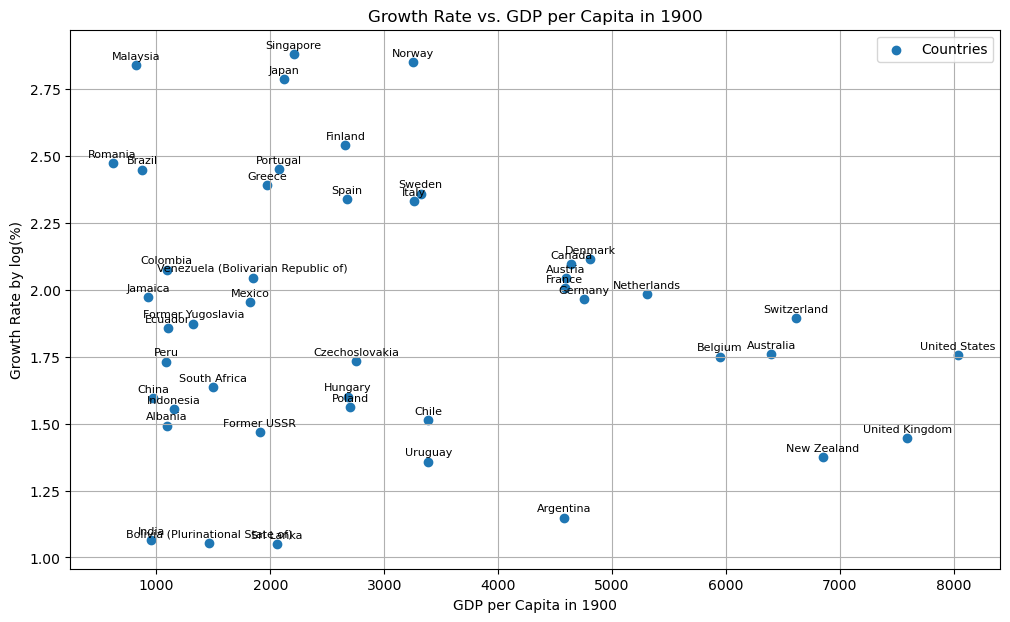

In [18]:
# Create a scatter plot with labels
plt.figure(figsize=(12, 7))
plt.scatter(gdp1900['gdppc'], gdp1900['growthrate'], label='Countries', marker='o')

# Label each point with the country name
for i, row in gdp1900.iterrows():
    x = row['gdppc']
    y = row['growthrate']
    label = row['country']
    
    label_x = x + 0
    label_y = y - 0.03
    plt.annotate(label, (label_x, label_y), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=8)
    
plt.xlabel('GDP per Capita in 1900')
plt.ylabel('Growth Rate by log(%)')
plt.title('Growth Rate vs. GDP per Capita in 1900')
plt.grid(True)
plt.legend()
plt.show()

If we use 1900 instead of 1870, there are 45 countries or data points on the plot. We can still see divergence during this last century, but probably a weaker divergence. The reason is that some poor countries have higher growth rate during the last century, for example, Malaysia and Brazil. The growth rate has not changed much for middle income and rich countries.